In [1]:
%matplotlib inline
import mne
import matplotlib.pyplot as plt
import autoreject

In [7]:
# from os import listdir
# from os.path import isfile, join
# fileList = [join('F:\\data', f) for f in listdir('F:\\data') if isfile(join('F:\\data', f))]
# print(fileList)


['F:\\data\\imagenet40-1000-1-00.bdf', 'F:\\data\\imagenet40-1000-1-01.bdf', 'F:\\data\\imagenet40-1000-1-02.bdf', 'F:\\data\\imagenet40-1000-1-03.bdf', 'F:\\data\\imagenet40-1000-1-04.bdf', 'F:\\data\\imagenet40-1000-1-05.bdf', 'F:\\data\\imagenet40-1000-1-06.bdf', 'F:\\data\\imagenet40-1000-1-07.bdf', 'F:\\data\\imagenet40-1000-1-08.bdf', 'F:\\data\\imagenet40-1000-1-09.bdf', 'F:\\data\\imagenet40-1000-1-10.bdf', 'F:\\data\\imagenet40-1000-1-11.bdf', 'F:\\data\\imagenet40-1000-1-12.bdf', 'F:\\data\\imagenet40-1000-1-13.bdf', 'F:\\data\\imagenet40-1000-1-14.bdf', 'F:\\data\\imagenet40-1000-1-15.bdf', 'F:\\data\\imagenet40-1000-1-16.bdf', 'F:\\data\\imagenet40-1000-1-17.bdf', 'F:\\data\\imagenet40-1000-1-18.bdf', 'F:\\data\\imagenet40-1000-1-19.bdf', 'F:\\data\\imagenet40-1000-1-20.bdf', 'F:\\data\\imagenet40-1000-1-21.bdf', 'F:\\data\\imagenet40-1000-1-22.bdf', 'F:\\data\\imagenet40-1000-1-23.bdf', 'F:\\data\\imagenet40-1000-1-24.bdf', 'F:\\data\\imagenet40-1000-1-25.bdf', 'F:\\data\\

In [8]:
# for file in fileList:
#     raw = mne.io.read_raw_bdf(file,preload=True, stim_channel='auto', verbose=False) 

KeyboardInterrupt: 

In [2]:
raw = mne.io.read_raw_bdf('F:\\data\\imagenet40-1000-1-00.bdf',preload=True, stim_channel='auto', verbose=False)

In [3]:
raw.resample(1024, npad="auto")

Trigger channel has a non-zero initial value of 131071 (consider using initial_event=True to detect this event)
401 events found
Event IDs: [ 65281 131069]
Trigger channel has a non-zero initial value of 131071 (consider using initial_event=True to detect this event)
401 events found
Event IDs: [ 65281 131069]


<RawEDF | imagenet40-1000-1-00.bdf, 105 x 1255424 (1226.0 s), ~1005.8 MB, data loaded>

In [4]:
raw.drop_channels(['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])

<RawEDF | imagenet40-1000-1-00.bdf, 99 x 1255424 (1226.0 s), ~948.3 MB, data loaded>

In [5]:
raw.rename_channels({'EXG1': 'T9', 'EXG2': 'T10',
'A1':'Fp1','A2':'AF7','A3':'AF3','A4':'F3','A5':'F5','A6':'F7','A7':'F9','A8':'FFC5h','A9':'FC3','A10':'FC5',
'A11':'FT7','A12':'FT9','A13':'FTT7h','A14':'C3','A15':'C5',
'A16':'T7','A17':'CCP5h','A18':'CP3','A19':'CP5','A20':'TP7',
'A21':'TP9','A22':'TPP7h','A23':'P5','A24':'P7','A25':'P9','A26':'PPO9h','A27':'PO7','A28':'O1','A29':'PO9',
'A30':'I1','A31':'OI1h','A32':'Oz',
'B1':'Fpz','B2':'AFF1h','B3':'AFF2h','B4':'F2','B5':'Fz','B6':'F1','B7':'FFC1h','B8':'FFC2h','B9':'FC2','B10':'FCz',
'B11':'FC1','B12':'FCC3h','B13':'FCC4h','B14':'C2','B15':'Cz',
'B16':'C1','B17':'CCP1h','B18':'CPP2h','B19':'CP2','B20':'CPz',
'B21':'CP1','B22':'CPP3h','B23':'CPP4h','B24':'P4','B25':'P2','B26':'Pz','B27':'P1','B28':'P3','B29':'PO3',
'B30':'PPO1h','B31':'POz','B32':'POO2h',
'C1':'Fp2','C2':'AF8','C3':'AF4','C4':'F4','C5':'F6','C6':'F8','C7':'F10','C8':'FFC6h','C9':'FC4','C10':'FC6',
'C11':'FT8','C12':'FT10','C13':'FTT8h','C14':'C4','C15':'C6',
'C16':'T8','C17':'CCP6h','C18':'CP4','C19':'CP6','C20':'TP8',
'C21':'TP10','C22':'TPP8h','C23':'P6','C24':'P8','C25':'P10','C26':'PPO10h','C27':'PO8','C28':'O2','C29':'PO10',
'C30':'I2','C31':'OI2h','C32':'Iz'})

<RawEDF | imagenet40-1000-1-00.bdf, 99 x 1255424 (1226.0 s), ~948.3 MB, data loaded>

In [6]:
montage_kind = "standard_1005"
montage = mne.channels.make_standard_montage(montage_kind)
raw.set_montage(montage, match_case=False)

<RawEDF | imagenet40-1000-1-00.bdf, 99 x 1255424 (1226.0 s), ~948.4 MB, data loaded>

In [7]:
raw.set_eeg_reference(ref_channels=['T9', 'T10'])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


<RawEDF | imagenet40-1000-1-00.bdf, 99 x 1255424 (1226.0 s), ~948.4 MB, data loaded>

In [8]:
raw_filt = raw.filter(2, 39, fir_design='firwin', picks=['eeg']) 

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 39 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 39.00 Hz
- Upper transition bandwidth: 9.75 Hz (-6 dB cutoff frequency: 43.88 Hz)
- Filter length: 1691 samples (1.651 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    3.4s finished


In [9]:
epochs = mne.make_fixed_length_epochs(raw_filt, duration=3, preload=True)
ar = autoreject.AutoReject(n_interpolate=[1, 2, 3, 4], random_state=11,
                           n_jobs=1, verbose=True)
ar.fit(epochs[:50])  # fit on a few epochs to save time
epochs_ar, reject_log = ar.transform(epochs, return_log=True)

Not setting metadata
408 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 408 events and 3072 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/98 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/98 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/50 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/4 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/50 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/50 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/50 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/50 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/408 [00:00<?,       ?it/s]

Dropped 22 epochs: 1, 3, 6, 11, 18, 94, 133, 142, 168, 183, 188, 190, 192, 277, 306, 330, 372, 374, 377, 389, 399, 400


Using matplotlib as 2D backend.


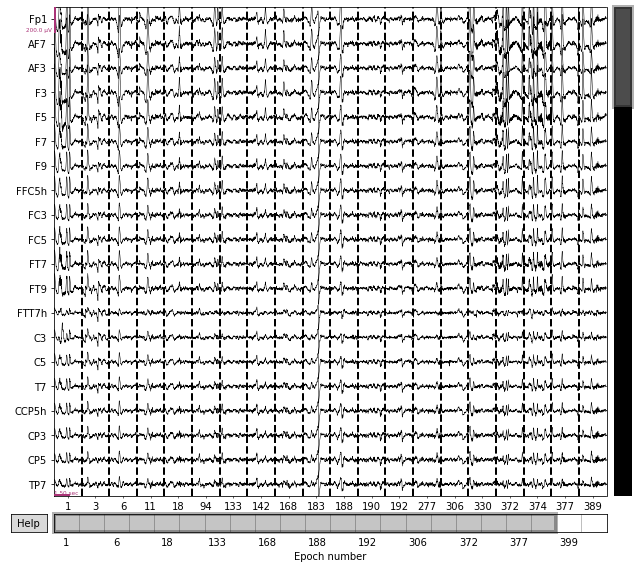

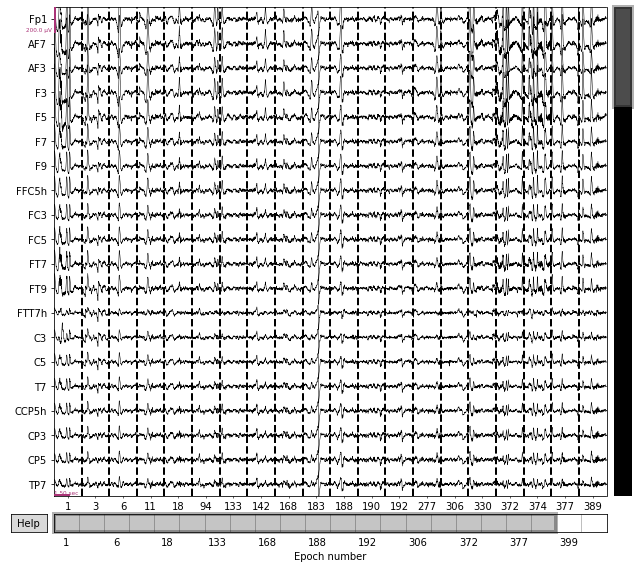

In [10]:
epochs[reject_log.bad_epochs].plot(scalings=dict(eeg=100e-6))

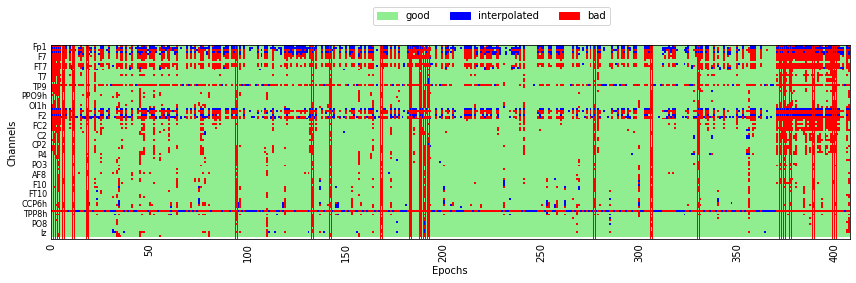

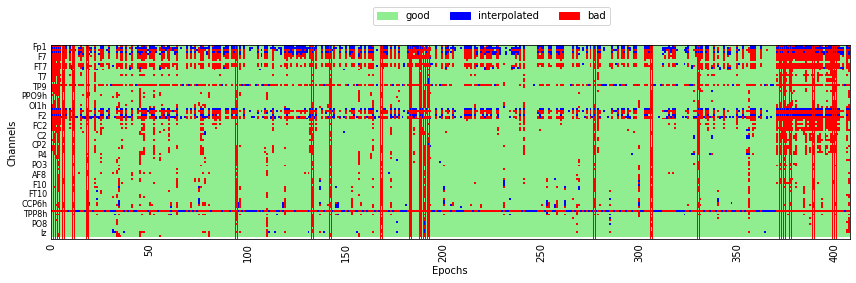

In [11]:
reject_log.plot('horizontal')

In [12]:
# compute ICA
ica = mne.preprocessing.ICA(n_components=30, max_iter=100, random_state=99)
ica.fit(raw_filt)

Fitting ICA to data using 98 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 84.6s.


Method,fastica
Fit,57 iterations on raw data (1255424 samples)
ICA components,30
Available PCA components,98
Channel types,eeg
ICA components marked for exclusion,—


In [13]:
ica.exclude = reject_log.bad_epochs


Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 98 PCA components


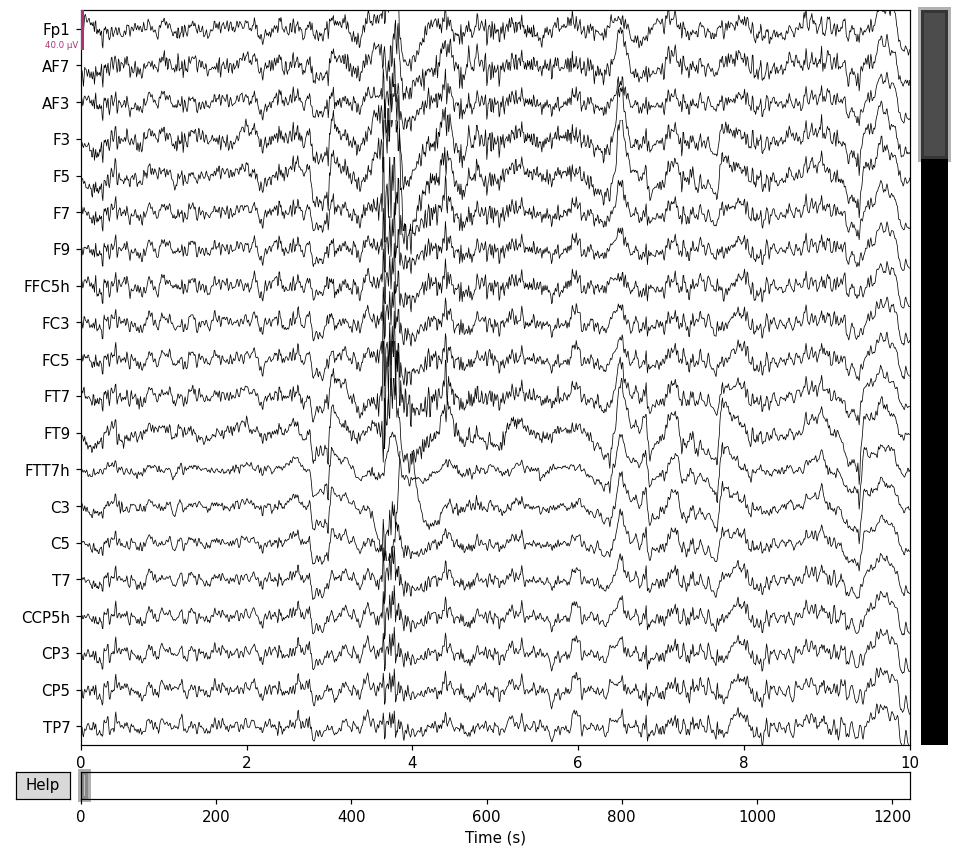

Channels marked as bad:
none
Channels marked as bad:
none


In [15]:
%matplotlib qt
reconst_raw = raw_filt.copy()
ica.apply(reconst_raw) 

raw_filt.plot()
reconst_raw.plot()

In [26]:
mne.export.export_raw('test.edf', reconst_raw, overwrite=True, verbose=None)

Overwriting existing file.
